# **Tabular Reinforcement Learning**

# Q-Learning on FrozenLake environment

## Non-Evaluables Practical Exercices

This is a non-evaluable practical exercise, but it is recommended that students complete it fully and individually, since it is an important part of the learning process.

The solution will be available, although it is not recommended that students consult the solution until they have completed the exercise. 

## The FrozenLake environment

In this activity, we are going to solve the [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) environment.

Main characteristics:
- The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.
- Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.
- The player makes moves until they reach the goal or fall in a hole.
- The lake is slippery (unless disabled) so the player may move perpendicular to the intended direction sometimes (see _is_slippery_ param).

<img src="https://gymnasium.farama.org/_images/frozen_lake.gif" />

## Q-Learning algorithm

<u>Question 1</u>: : **Implement the *Q-Learning* algorithm** using the following parameters:

- Number of episodes = 15,000
- *learning rate* = 0.8
- *discount factor* = 1

Additionally, implement de **$\epsilon$-Greedy with decay factor** method with the following parameters:
- *epsilon* = 1.0
- *max_epsilon* = 1.0
- *min_epsilon* = 0.01
- *decay_rate* = 0.005

<u>Question 2</u>: Once you have coded the algorithm, try different **values for the hyperparameters** and comment the best ones (providing an empirical comparison):

- Number of episodes
- *learning rate* 
- *discount factor* 
- *epsilon* values (including min value and decay factor)

<u>Question 3</u>: Try to solve the same environment but using a _8 x 8_ grid (also in slippery mode):
> gym.make(ENV_NAME, desc=None, map_name="8x8", is_slippery=True)

In [1]:
import gymnasium as gym

# definig the environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Discrete(16) 
Reward range is (0, 1) 


In [2]:
def epsilon_greedy_policy(Q, state, nA, epsilon):
    '''
    Create a policy where epsilon dictates the probability of a random action being carried out.

    :param Q: link state -> action value (dictionary)
    :param state: state in which the agent is (int)
    :param nA: number of actions (int)
    :param epsilon: possibility of random movement (float)
    :return: probability of each action (list) d
    '''

    probs = np.ones(nA)
    
    return probs


def QLearning(episodes, learning_rate, discount, epsilon):
    '''
    Learn to solve the environment using the Q-Learning algorithm

    :param episodes: Number of episodes (int)
    :param learning_rate: Learning rate (float [0, 1])
    :param discount: Discount factor (float [0, 1])
    :param epsilon: chance that random movement is required (float [0, 1])
    :return: x,y number of episodes and number of steps
    :Q: action value function
    '''

    # Link actions to states
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    return Q

<div class="alert alert-block alert-danger">
<strong>Solution</strong>
</div>

The following code implement the exponential and linear decay factor functions:

In [3]:
import numpy as np


class ExpDecayFactor():
    def __init__(self, epsilon = 1.0, max_epsilon = 1.0, min_epsilon = 0.01, decay_rate = 0.005):
        '''
        :param epsilon: Exploration rate
        :param max_epsilon: Exploration probability at start
        :param min_epsilon: Minimum exploration probability 
        :param decay_rate: Exponential decay rate for exploration prob
        '''
        self.epsilon = epsilon
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.decay_rate = decay_rate
        self.episode = 0
        
    def update(self):
        self.episode += 1
        self.epsilon = self.min_epsilon + (self.max_epsilon - self.min_epsilon) * np.exp(- self.decay_rate * self.episode) 
        return self.epsilon
    
    def reset(self):
        self.episode = 0
        
        
class LinDecayFactor():
    def __init__(self, epsilon, min_epsilon, decay_rate):
        '''
        :param epsilon: Exploration rate at start
        :param min_epsilon: Minimum exploration probability 
        :param decay_rate: Exponential decay rate for exploration prob
        '''
        self.init_eps = epsilon
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.decay_rate = decay_rate
        
    def update(self):
        self.epsilon = max(self.epsilon * self.decay_rate, self.min_epsilon)
        return self.epsilon
    
    def reset(self):
        self.epsilon = self.init_eps

We create a soft-policy according to the specified parameters and plot the evolution of epsilon:

In [4]:
import matplotlib.pyplot as plt


def plot_decay_func(func, NUM_EPISODES, MIN_EPSILON):
    values = [func.update() for _ in range(NUM_EPISODES)]

    fig, ax = plt.subplots()
    ax.plot(values, color='b', linestyle='-')
    plt.axhline(y=MIN_EPSILON, color='r', linestyle=':') 
    plt.show()
    
    
def plot_moving_average(y, window=100):
    ave_y = np.zeros(len(y))
    for i in range(window, len(y), 1):
        ave_y[i] = np.average(y[(i-window):i])

    fig, ax = plt.subplots()
    ax.plot(ave_y)
    plt.show()

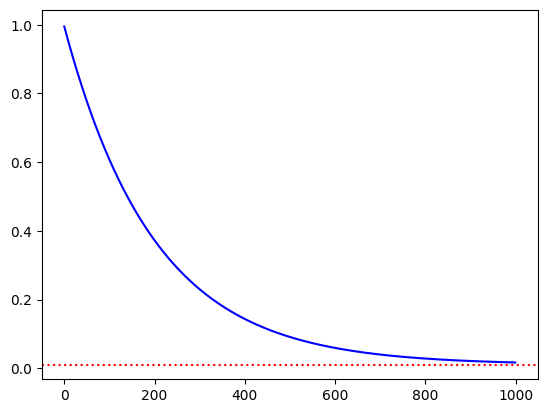

In [5]:
decay_func = ExpDecayFactor(epsilon=1.0, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.005)
plot_decay_func(decay_func, 1000, 0.01)

Define the $\epsilon$-greedy soft policy:

In [6]:
def epsilon_greedy_policy(Q, state, nA, epsilon):
    '''
    Create a policy where epsilon dictates the probability of a random action being carried out.

    :param Q: link state -> action value (dictionary)
    :param state: state in which the agent is (int)
    :param nA: number of actions (int)
    :param epsilon: possibility of random movement (float)
    :return: probability of each action (list) d
    '''
    probs = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    probs[best_action] += (1.0 - epsilon)

    return probs

The `QLearning` class implements the training of a Q-learning algorithm for a `num_episodes` in a specified `env`.

In [7]:
import sys
from tensorboardX import SummaryWriter


def QLearning(env, num_episodes, learning_rate, discount, decay):
    '''
    Learn to solve the environment using the Q-Learning algorithm

    :param episodes: Number of episodes (int)
    :param learning_rate: Learning rate (float [0, 1])
    :param discount: Discount factor (float [0, 1])
    :param decay: Decay factor function 
    '''
    # Link actions to states
    action_size = env.action_space.n
    state_size = env.observation_space.n
    Q = np.zeros((state_size, action_size))

    # List of rewards
    rewards = []

    for episode in range(num_episodes):
        # Reset the environment
        state, _ = env.reset()
        step, done = 0, False
        total_rewards = 0
        
        # Update epsilon
        epsilon = decay.update()
        
        while not done:
            # Select an action
            probs = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
            action = np.random.choice(np.arange(len(probs)), p=probs)

            # Execute action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Update Q(s,a) = Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from next state
            Q[state, action] = Q[state, action] + learning_rate * (reward + discount * np.max(Q[next_state, :]) - Q[state, action])
            
            # Our next state is state
            total_rewards += reward
            state = next_state
            
        rewards.append(total_rewards)

        # We print which episode we are in, useful for debugging.
        if episode % 100 == 0 and episode > 0:
            print("\rEpisode {:8d}/{:8d} - Average reward {:.2f}".format(episode, num_episodes, np.average(rewards[(episode-100):episode])), end="")
            sys.stdout.flush()
    
    return rewards, Q

We define an exponential decay function and use it to train the Q-Learning agent on Frozen Lake, using the following parameters:

- Number of episodes = 15,000
- *learning rate* = 0.8
- *discount factor* = 1
- *epsilon* = 1.0
- *max_epsilon* = 1.0
- *min_epsilon* = 0.01
- *decay_rate* = 0.005

In [8]:
decay_func = ExpDecayFactor(epsilon=1.0, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.005)
y, Q = QLearning(env, num_episodes=15000, learning_rate=0.8, discount=0.95, decay=decay_func)

Episode    14900/   15000 - Average reward 0.96

Plotting the moving average reward is useful to understand the behaviour of the agent.

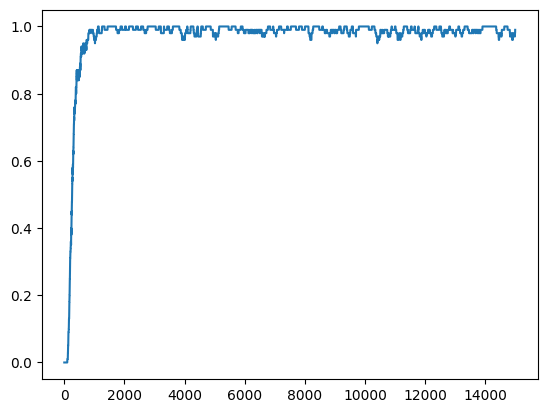

In [9]:
plot_moving_average(y, window=100)

Print the Q action-value function:

In [10]:
print(Q)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.72921074 0.         0.81450625 0.75016036]
 [0.77233139 0.857375   0.77370209 0.81334023]
 [0.81450279 0.         0.         0.49258214]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81303511]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


We execute an episode following the optimal policy:

In [11]:
def execute_episode(q, env, debug=False):
    obs, _ = env.reset()
    t, total_reward, done = 0, 0, False

    if debug:
        print("Obs initial: {} ".format(obs))

    while not done: 
        # Choose an action following the optimal policy (no epsilon-greedy)
        arr = np.array(q[obs])
        action = arr.argmax()
       
        # Execute the action and wait for the response from the environment
        new_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        obs = new_obs
        if debug:
            print("Action: {} -> Obs: {} and reward: {}".format(action, obs, reward))

        total_reward += reward
        t += 1
   
    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    return total_reward

In [12]:
execute_episode(Q, env, debug=True)

Obs initial: 0 
Action: 1 -> Obs: 4 and reward: 0.0
Action: 1 -> Obs: 8 and reward: 0.0
Action: 2 -> Obs: 9 and reward: 0.0
Action: 1 -> Obs: 13 and reward: 0.0
Action: 2 -> Obs: 14 and reward: 0.0
Action: 2 -> Obs: 15 and reward: 1.0
Episode finished after 6 timesteps and reward was 1.0 


1.0

Finally, we test our policy on the **_slippery_ version** of the environment (param `is_slippery=True`).

In [13]:
from tensorboardX import SummaryWriter

# definig the environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

writer = SummaryWriter(comment="-qlearning")

TEST_EPISODES = 20

total_reward = 0.0
for iter_no in range(TEST_EPISODES):
    reward = execute_episode(Q, env)
    writer.add_scalar("reward", reward, iter_no)
    total_reward += reward

avg_reward = total_reward / TEST_EPISODES
print("Average reward is {} ({} episodes)".format(avg_reward, TEST_EPISODES))
if reward > 0.80:
    print("Environment solved!")

writer.close()

Episode finished after 3 timesteps and reward was 0.0 
Episode finished after 6 timesteps and reward was 0.0 
Episode finished after 2 timesteps and reward was 0.0 
Episode finished after 3 timesteps and reward was 0.0 
Episode finished after 4 timesteps and reward was 0.0 
Episode finished after 6 timesteps and reward was 0.0 
Episode finished after 4 timesteps and reward was 0.0 
Episode finished after 4 timesteps and reward was 0.0 
Episode finished after 5 timesteps and reward was 0.0 
Episode finished after 4 timesteps and reward was 0.0 
Episode finished after 2 timesteps and reward was 0.0 
Episode finished after 2 timesteps and reward was 0.0 
Episode finished after 21 timesteps and reward was 1.0 
Episode finished after 3 timesteps and reward was 0.0 
Episode finished after 3 timesteps and reward was 0.0 
Episode finished after 5 timesteps and reward was 0.0 
Episode finished after 2 timesteps and reward was 0.0 
Episode finished after 8 timesteps and reward was 1.0 
Episode f

We explore hyperparameters of the agent:

- Let's start by the **learning rate** parameter.

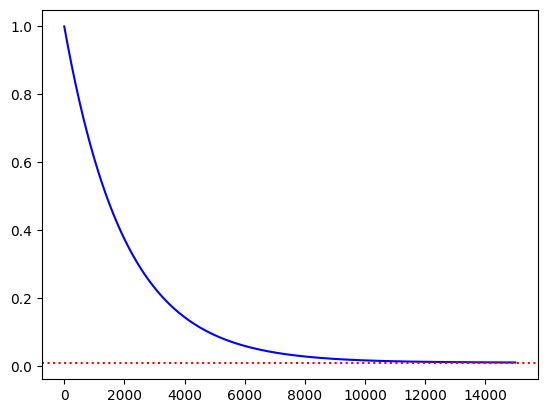

*** Learning rate : 0.2000 ***
Episode    14900/   15000 - Average reward 0.99

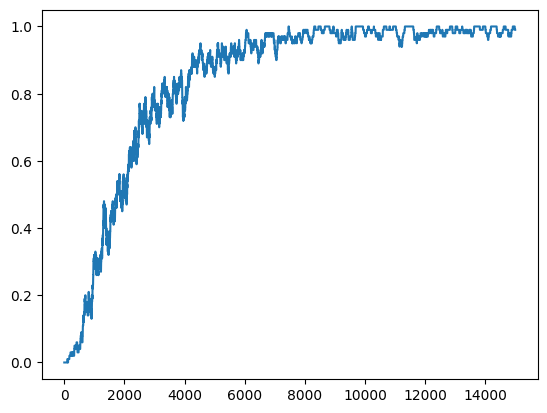

*** Learning rate : 0.3000 ***
Episode    14900/   15000 - Average reward 0.99

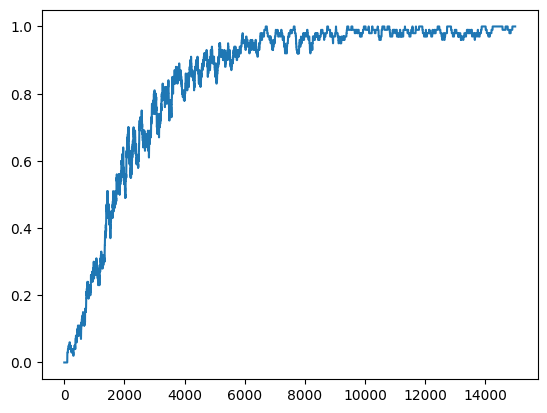

*** Learning rate : 0.4000 ***
Episode    14900/   15000 - Average reward 0.98

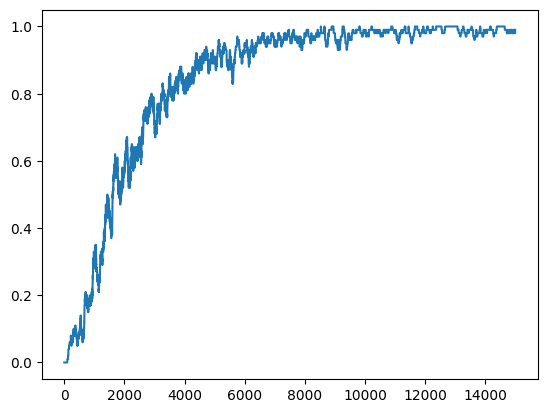

*** Learning rate : 0.5000 ***
Episode    14900/   15000 - Average reward 0.98

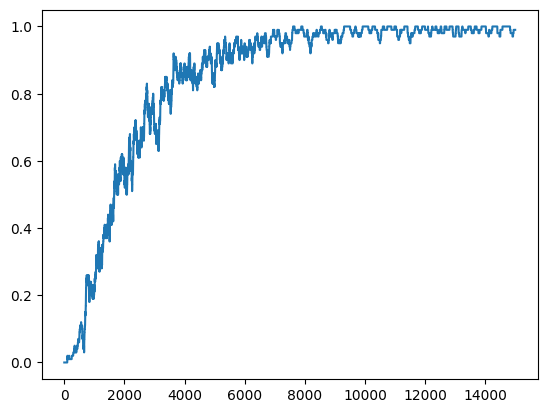

*** Learning rate : 0.6000 ***
Episode    14900/   15000 - Average reward 1.00

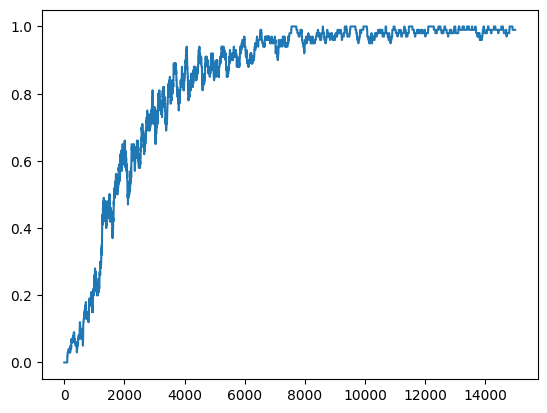

*** Learning rate : 0.7000 ***
Episode    14900/   15000 - Average reward 1.00

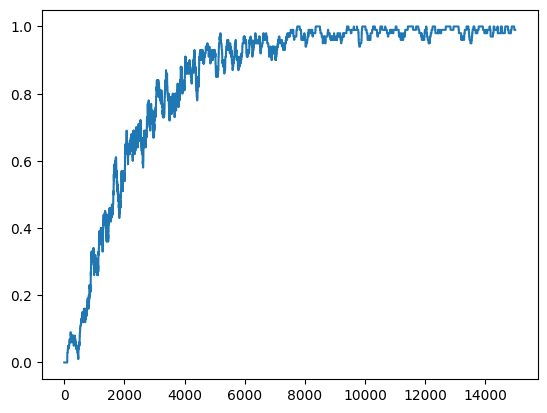

*** Learning rate : 0.8000 ***
Episode    14900/   15000 - Average reward 1.00

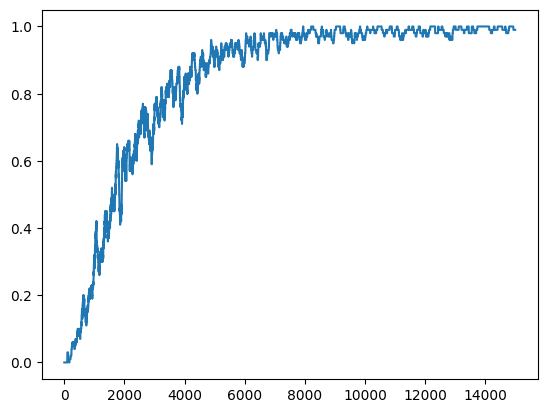

*** Learning rate : 0.9000 ***
Episode    14900/   15000 - Average reward 0.98

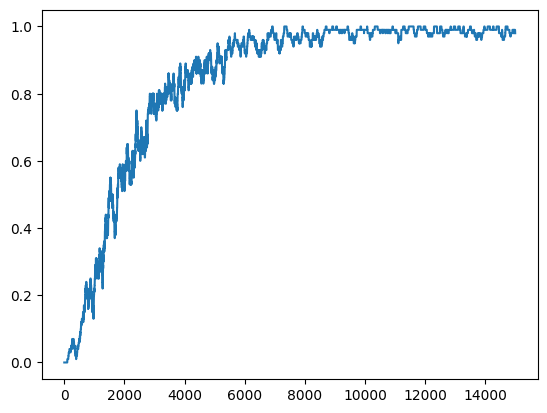

In [14]:
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

# PARAMS
# AGENT
NUM_EPISODES = 15000
LEARNING_RATE = 0.8
GAMMA = 0.95
# DECAY FUNCTION
EPSILON = 1.0
MAX_EPSILON = 1.0
MIN_EPSILON = 0.01
DECAY_RATE = 5e-4

# exponential decay factor
decay_func = ExpDecayFactor(EPSILON, MAX_EPSILON, MIN_EPSILON, DECAY_RATE)
plot_decay_func(decay_func, NUM_EPISODES, MIN_EPSILON)

for lr in np.arange(start=0.2, stop=1.0, step=0.1):
    print("*** Learning rate : {:.4f} ***".format(lr))
    decay_func.reset()
    y, Q = QLearning(env, num_episodes=NUM_EPISODES, learning_rate=lr, discount=GAMMA, decay=decay_func)
    plot_moving_average(y)

- And continue with the **decay factor** parameter.

*** Decay factor : 0.0001 ***


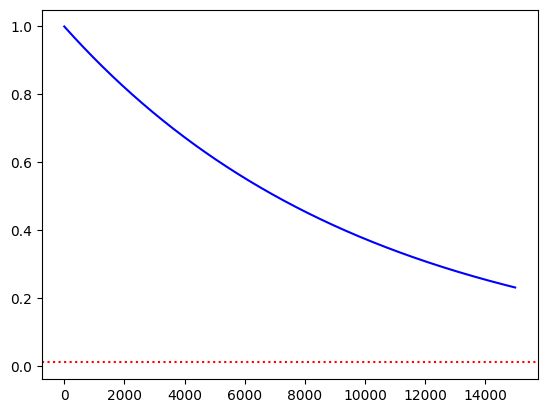

Episode    14900/   15000 - Average reward 0.78

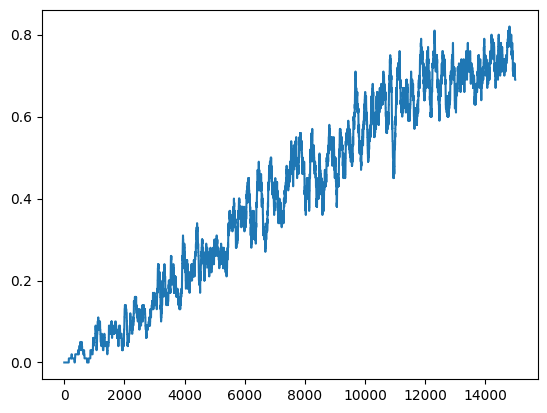

*** Decay factor : 0.0005 ***


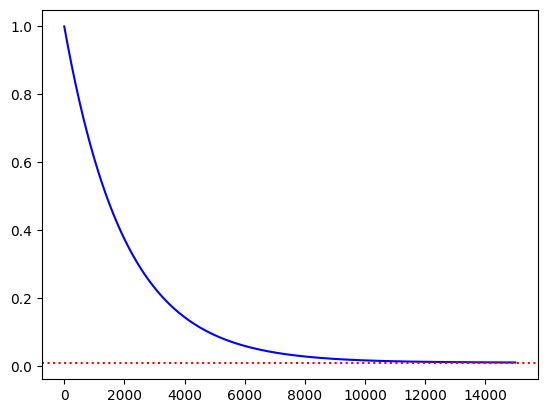

Episode    14900/   15000 - Average reward 0.98

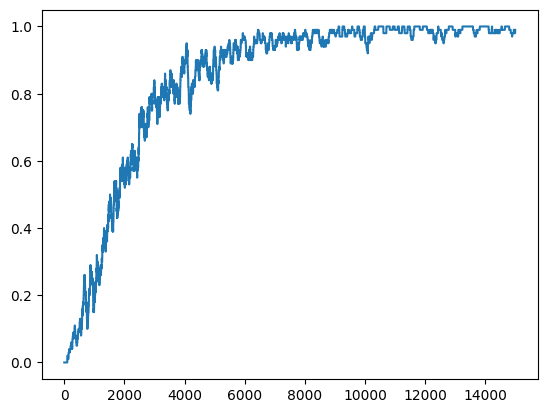

*** Decay factor : 0.0010 ***


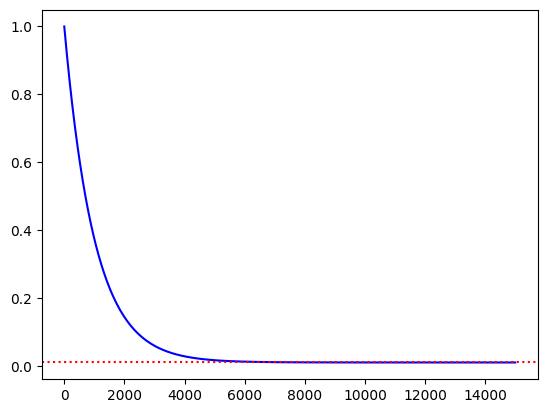

Episode    14900/   15000 - Average reward 0.98

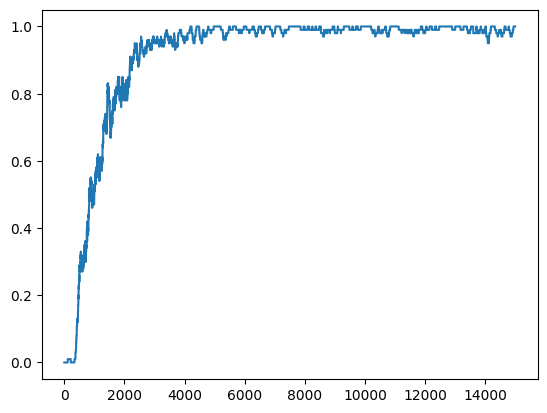

*** Decay factor : 0.0050 ***


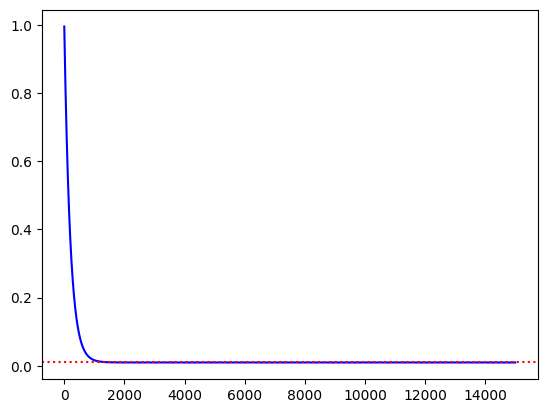

Episode    14900/   15000 - Average reward 0.99

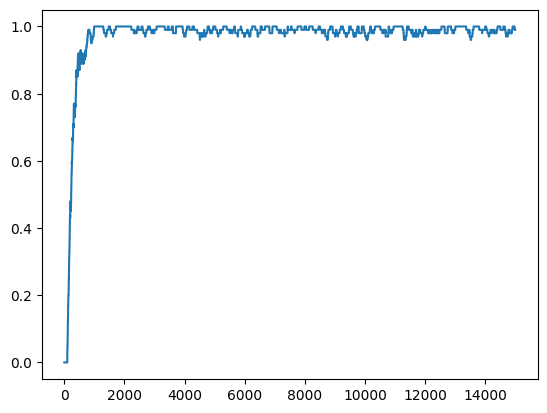

*** Decay factor : 0.0100 ***


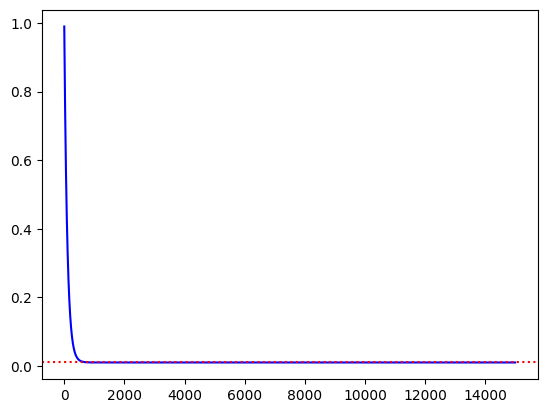

Episode    14900/   15000 - Average reward 0.00

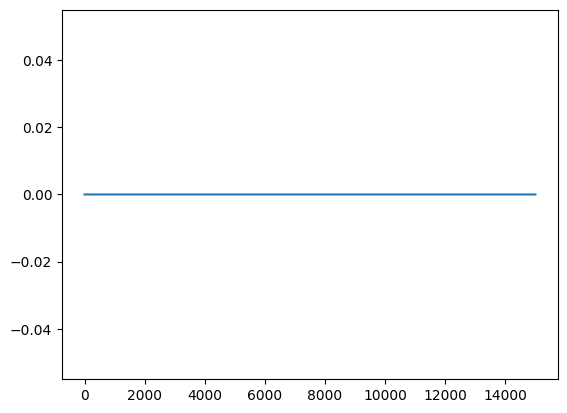

*** Decay factor : 0.0500 ***


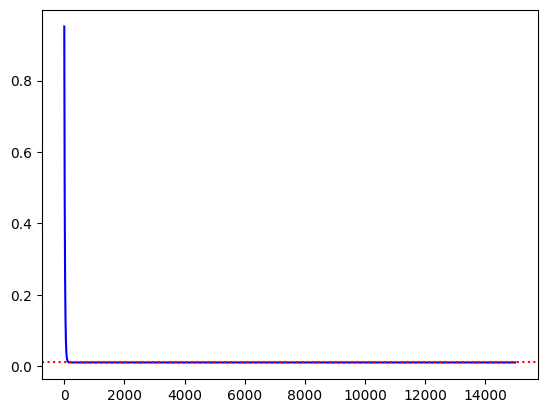

Episode    14900/   15000 - Average reward 0.00

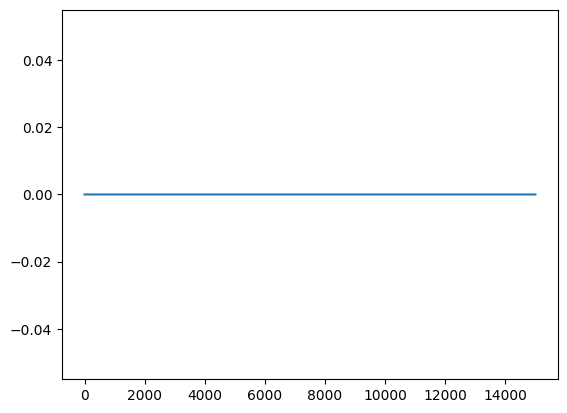

In [15]:
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

# PARAMS
# AGENT
NUM_EPISODES = 15000
LEARNING_RATE = 0.8
GAMMA = 0.95
# DECAY FUNCTION
EPSILON = 1.0
MAX_EPSILON = 1.0
MIN_EPSILON = 0.01
DECAY_RATE = 5e-4

for dr in [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2]:
    print("*** Decay factor : {:.4f} ***".format(dr))
    # exponential decay factor
    decay_func = ExpDecayFactor(EPSILON, MAX_EPSILON, MIN_EPSILON, dr)
    plot_decay_func(decay_func, NUM_EPISODES, MIN_EPSILON)
    decay_func.reset()
    
    y, Q = QLearning(env, num_episodes=NUM_EPISODES, learning_rate=lr, discount=GAMMA, decay=decay_func)
    plot_moving_average(y)